In [3]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import inf
import math
from numpy import pi
import pandas as pd

In [14]:
# 只需要每个点的梯度
save_file = 'gen_track.csv'

S = 30000
dS = 10
num_s = int(S / dS) + 1
theta = 45
grad = math.tan(theta * pi / 180)

min_h = 100

s = np.linspace(0, S, num_s)
len(s), grad

(3001, 0.9999999999999999)

In [11]:
# 设计9段
stage_cnt = 9
stage_len = S / stage_cnt
stage_begins = [stage_len * i for i in range(stage_cnt)]
stage_begins

[0.0,
 3333.3333333333335,
 6666.666666666667,
 10000.0,
 13333.333333333334,
 16666.666666666668,
 20000.0,
 23333.333333333336,
 26666.666666666668]

In [12]:
# 每一段的坡度
stage_grads = [0, grad, 0, -grad, 0, grad, 0, -grad, 0]
len(stage_grads)

9

In [19]:
distance = np.zeros(num_s)
gradients = np.zeros(num_s)

altitudes = np.zeros(num_s)
altitudes[0] = min_h

cur_stage = 0
for s_iter in range(num_s):
    distance[s_iter] = s_iter * dS
    if cur_stage < stage_cnt - 1 and distance[s_iter] > stage_begins[cur_stage + 1]:
        cur_stage += 1
    gradients[s_iter] = stage_grads[cur_stage]
    if s_iter != num_s - 1:
        altitudes[s_iter + 1] = altitudes[s_iter] + dS * stage_grads[cur_stage]

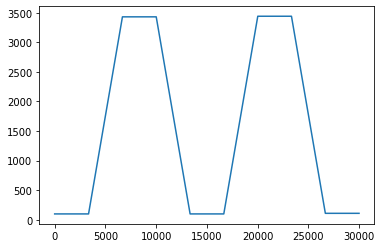

In [20]:
plt.plot(distance, altitudes)

In [21]:
data = pd.DataFrame({'DistanceMeters':distance, 'AltitudeMeters':altitudes, 'Gradient':gradients})
data.shape

(3001, 3)

In [22]:
data.head()

,DistanceMeters,AltitudeMeters,Gradient
0,0.0,100.0,0.0
1,10.0,100.0,0.0
2,20.0,100.0,0.0
3,30.0,100.0,0.0
4,40.0,100.0,0.0


In [23]:
data.to_csv(save_file)